# Westeros Tutorial Part II - Introducing a carbon tax 
In the first part, the model chose not base the power system on wind power as electricity from  wind turbines was more expensive than electricity produced from coal. However, now we introduce a carbon tax. Let's see what happens then.

In [210]:
import pandas as pd
import ixmp as ix
import message_ix

from message_ix.utils import make_df

%matplotlib inline

In [211]:
mp = ix.Platform(dbtype='HSQLDB')

INFO:root:launching ixmp.Platform with local HSQLDB database at 'C:\Users\ga46gup\.local\ixmp\localdb\default'


In [212]:
model = 'Westeros Electrified'

base = message_ix.Scenario(mp, model=model, scen='baseline')
scen = base.clone(model, 'carbon_tax','introducing a carbon tax', keep_sol=False)
scen.check_out()

In [213]:
vintage_years, act_years = scen.vintage_and_active_years()
model_horizon = scen.set('year')
country = 'Westeros'

## Introducing Emissions

In [214]:
# first we introduce CO2 
scen.add_set('emission', 'CO2')
scen.add_set('type_emission', 'CO2')
scen.add_set('cat_emission', ['CO2','CO2'])


# we now add CO2 emissions to the coal PPL
base_emission_factor = {
    'node_loc': country,
    'year_vtg': vintage_years,
    'year_act': act_years,
    'mode': 'standard',
    'unit': 'USD/GWa',
}

emission_factor = make_df(base_emission_factor, technology= 'coal_ppl', emission= 'CO2', value = 100)
scen.add_par('emission_factor', emission_factor)


## Introduce Emission Tax

In [215]:
scen.add_set('type_year', [700,710,720])

base_tax_emission = {
    'node': country,
    'type_year': [700,710,720],
    'type_tec': 'all',
    'unit': '???',
    'type_emission': 'CO2',
}

tax_emission = make_df(base_tax_emission, value = 10)
scen.add_par('tax_emission', tax_emission)
tax_emission

,node,type_emission,type_tec,type_year,unit,value
0,Westeros,CO2,all,700,???,10
1,Westeros,CO2,all,710,???,10
2,Westeros,CO2,all,720,???,10


## Time to Solve the Model

In [216]:
scen.commit(comment='basic model of Westeros electrification')
scen.set_as_default()

In [217]:
scen.solve()

In [218]:
scen.var('OBJ')['lvl']

368788.90625

# Plotting Results

In [219]:
from tools import Plots
p = Plots(scen, country, firstyear=700)

# Activity

How much energy is generated in each time period from the different potential sources?

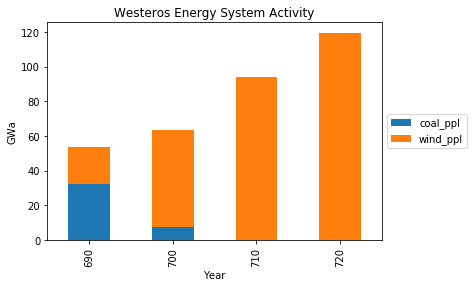

In [220]:
p.plot_activity(baseyear=True, subset=['coal_ppl', 'wind_ppl'])

## New Capacity

How many new plants are built?

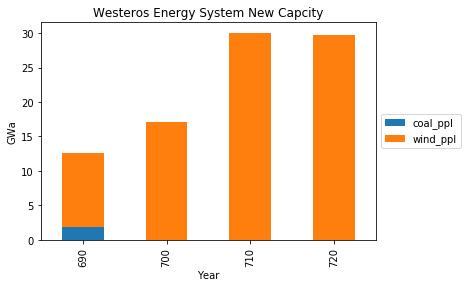

In [221]:
p.plot_new_capacity(baseyear=True, subset=['coal_ppl', 'wind_ppl'])

## Capacity

Given how many new plants are built, how many are actually used?

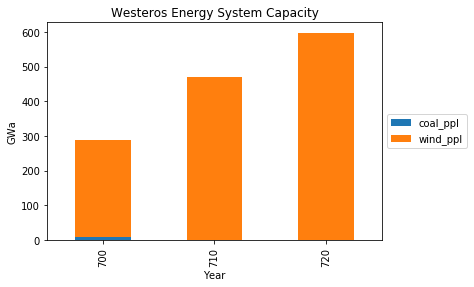

In [222]:
p.plot_capacity(baseyear=True, subset=['coal_ppl', 'wind_ppl'])

## Electricity Price

And how much does the electricity cost? These prices are taken from the **dual variables** of the solution and are given the name **shadow prices**. They reflect the marginal price of electricity, taken from the most expensive producer.  

Note that the price drop when the most expensive technology is no longer in the system.

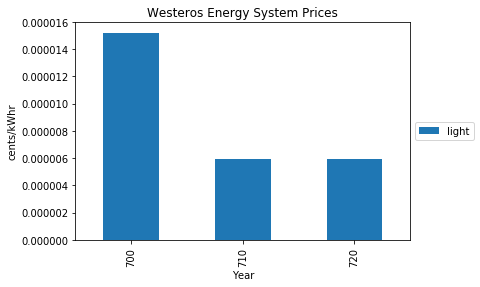

In [223]:
p.plot_prices(subset=['light'], baseyear=True)

# Fin

With that, you have built and run your very first MESSAGEix model. Welcome to the community!

Check us out on Github: https://github.com/iiasa/message_ix  

Get in touch with us online: https://groups.google.com/forum/message-ix  

And feel free to contact me with any further questions: gidden@iiasa.ac.at

In [224]:
mp.close_db()